# Assignment no 2
Name: Vishal Pattar \
Roll no: 33557 \
Class: TE AIML \
Subject: Machine Intelligence for Data Science

In [2]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('./Twitter_dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
9829,0,2033634505,Thu Jun 04 12:59:09 PDT 2009,NO_QUERY,tawny830,Lake show!!!!!!! Work at 6... Going away shind...
3914,0,1992129000,Mon Jun 01 08:14:55 PDT 2009,NO_QUERY,lorena_diniz,@officialnjonas I have not been for the show! ...
1748,4,1971232209,Sat May 30 06:34:47 PDT 2009,NO_QUERY,AmariLovely,@shirtlessrob I hope you have/had a nice fligh...
7112,0,2058581674,Sat Jun 06 15:13:27 PDT 2009,NO_QUERY,reenamerchant,Wishing the mall didn't close at 6
2622,0,2202407218,Tue Jun 16 21:44:40 PDT 2009,NO_QUERY,Mmalina,"@mateaar ugh, yea I know, I've seen it. Its go..."


In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,4,2182273511,Mon Jun 15 12:57:17 PDT 2009,NO_QUERY,boobop2015,im sooooo funny ik! camp is so fun! iguess????...
2,0,1881349755,Fri May 22 04:24:05 PDT 2009,NO_QUERY,sugarLUMP81,@Schofe One of my favourite songs and definite...
3,4,1995169248,Mon Jun 01 13:03:35 PDT 2009,NO_QUERY,xGirlFixerx,I'm really pale so I find greys and blacks are...
4,0,2324489332,Thu Jun 25 03:17:05 PDT 2009,NO_QUERY,prettiebillie,i need the sources and anything else thats nec...


In [5]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
print("Length of the data: {}".format(len(df)))

Length of the data: 10001


In [7]:
df.shape

(10001, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10001 non-null  int64 
 1   ids     10001 non-null  int64 
 2   date    10001 non-null  object
 3   flag    10001 non-null  object
 4   user    10001 non-null  object
 5   text    10001 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [9]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [10]:
np.sum(df.isnull().any(axis=1))

0

In [11]:
print("Count of columns in the data {}".format(len(df.columns)))
print("Count of rows in the data {}".format(len(df)))

Count of columns in the data 6
Count of rows in the data 10001


In [12]:
df['target'].unique()

array([0, 4], dtype=int64)

In [13]:
df['target'].nunique()

2

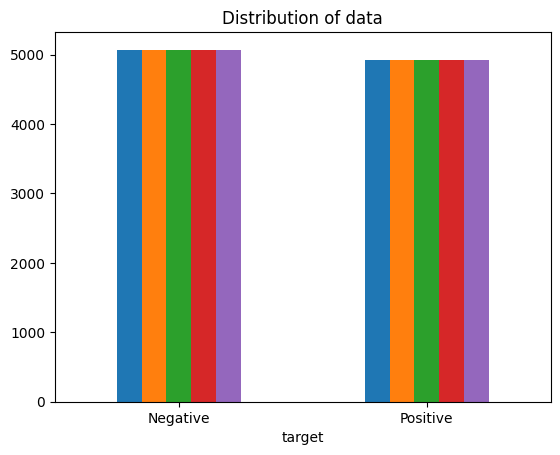

In [14]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

e:\Programs\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Programs\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Programs\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='target', ylabel='count'>

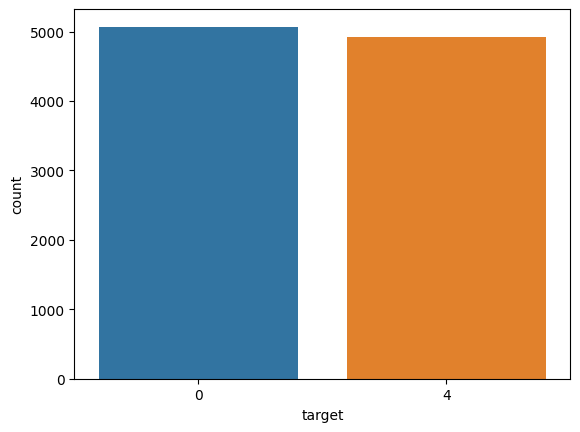

In [15]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [16]:
data = df[['text','target']]

In [17]:
data['target'] = data['target'].replace(4,1)

C:\Users\Vishal Pattar\AppData\Local\Temp\ipykernel_5248\2499609609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [18]:
data.sample(10)

,text,target
3651,it's time for DINNER! or.. too early? who care...,1
665,@xoxDATRAxox i am bored!!!!!! and leaving you ...,1
8141,@upthejunction #firstrecord was Never gonna gi...,1
1557,has to redo my whole ipod,0
8067,@mileycyrus yaaaaaaaay ther is a 4th season i ...,1
2029,I want to know y ra is not having fun,0
7670,HOME! tired as bro and still buckets of homewo...,0
2290,Aw crap I &quot;favorited&quot; someones tweet...,0
6804,@CRMFYI Wow. That is impressive. My son (6) is...,0
2413,cant breathe,0


In [19]:
data['target'].unique()

array([0, 1], dtype=int64)

In [20]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [21]:
data_pos = data_pos.iloc[:int(2000)]
data_neg = data_neg.iloc[:int(2000)]

In [22]:
dataset = pd.concat([data_pos, data_neg])

In [23]:
dataset['text'] = dataset['text'].str.lower()
dataset.tail()

,text,target
9993,f**k! drop by 1 28. topseos.com,0
9994,"the weekend is over, tomorrow @ merida",0
9996,man today is so boring nothing to do,0
9998,my hair is fading,0
9999,so freakingg sickkk... ughhh,0


In [24]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stopwordlist = stopwords.words('english')

In [25]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [26]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

1     im sooooo funny ik! camp fun! iguess???? could...
3     i'm really pale find greys blacks dark me. dar...
6              http://twitpic.com/6s6pd - rootbeer shit
10    change machine wasn't working laundromat i'm o...
11    @robbiecurlee told paula exchange vists folks ...
Name: text, dtype: object

In [27]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

9993          fk drop 1 28 topseoscom
9994    weekend over tomorrow  merida
9996         man today boring nothing
9998                      hair fading
9999           freakingg sickkk ughhh
Name: text, dtype: object

In [28]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

9993           fk drop1 28 topseoscom
9994    weekend over tomorrow  merida
9996         man today boring nothing
9998                      hair fading
9999           freakingg sickkk ughhh
Name: text, dtype: object

In [29]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

9993           fk drop1 28 topseoscom
9994    weekend over tomorrow  merida
9996         man today boring nothing
9998                      hair fading
9999           freakingg sickkk ughhh
Name: text, dtype: object

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

9993              fk drop  topseoscom
9994    weekend over tomorrow  merida
9996         man today boring nothing
9998                      hair fading
9999           freakingg sickkk ughhh
Name: text, dtype: object

In [31]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

1            []
3           [w]
6           [w]
10    [w, w, w]
11          [w]
Name: text, dtype: object

In [32]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

1            []
3           [w]
6           [w]
10    [w, w, w]
11          [w]
Name: text, dtype: object

In [33]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

1            []
3           [w]
6           [w]
10    [w, w, w]
11          [w]
Name: text, dtype: object

In [34]:
X=data.text
y=data.target

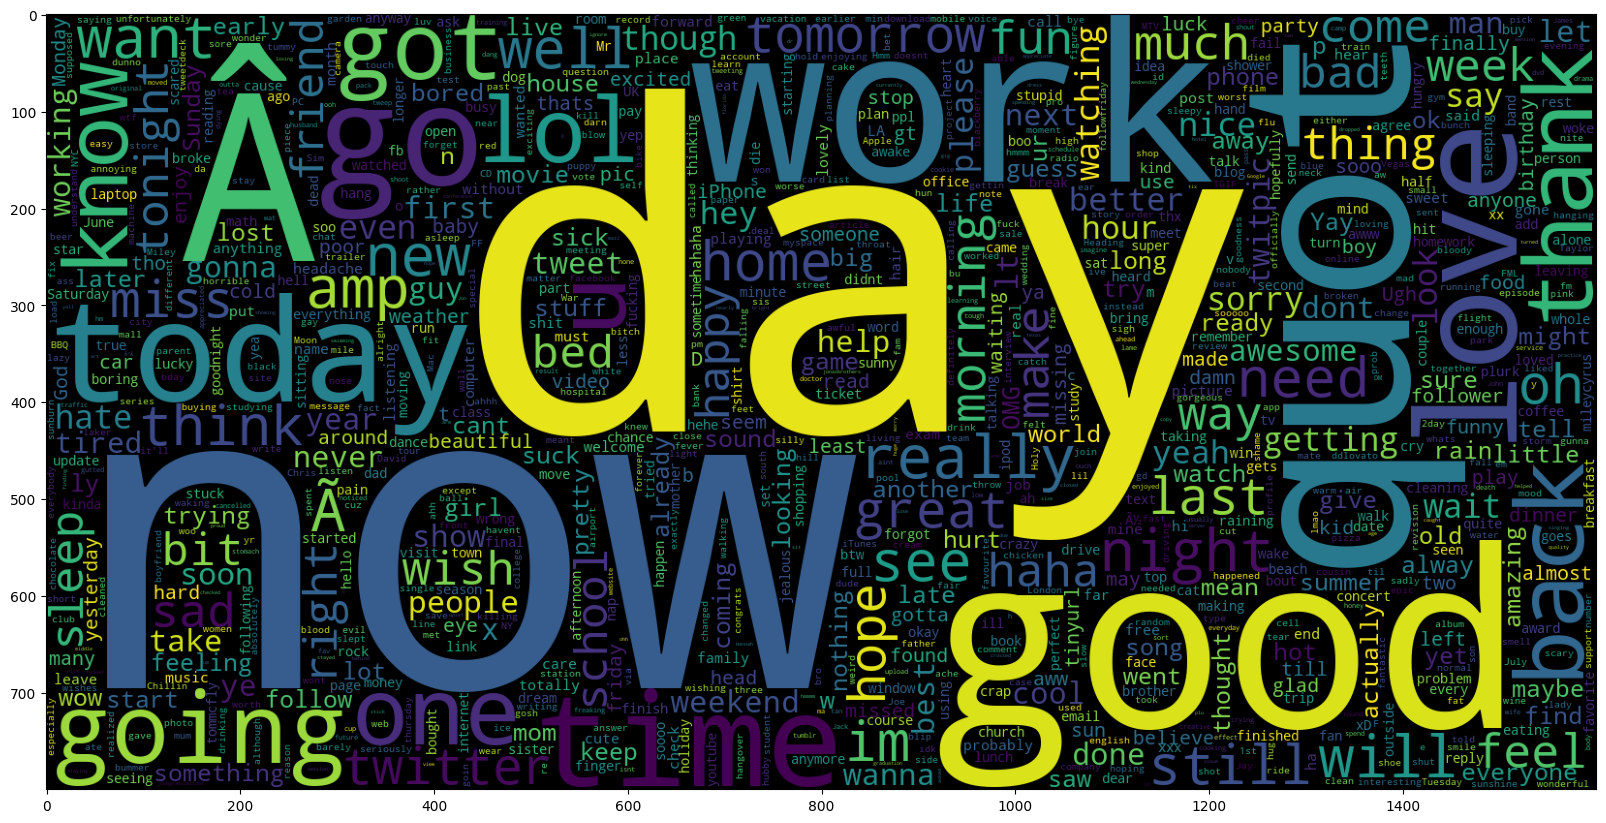

In [35]:
data_neg = data['text'][:8000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

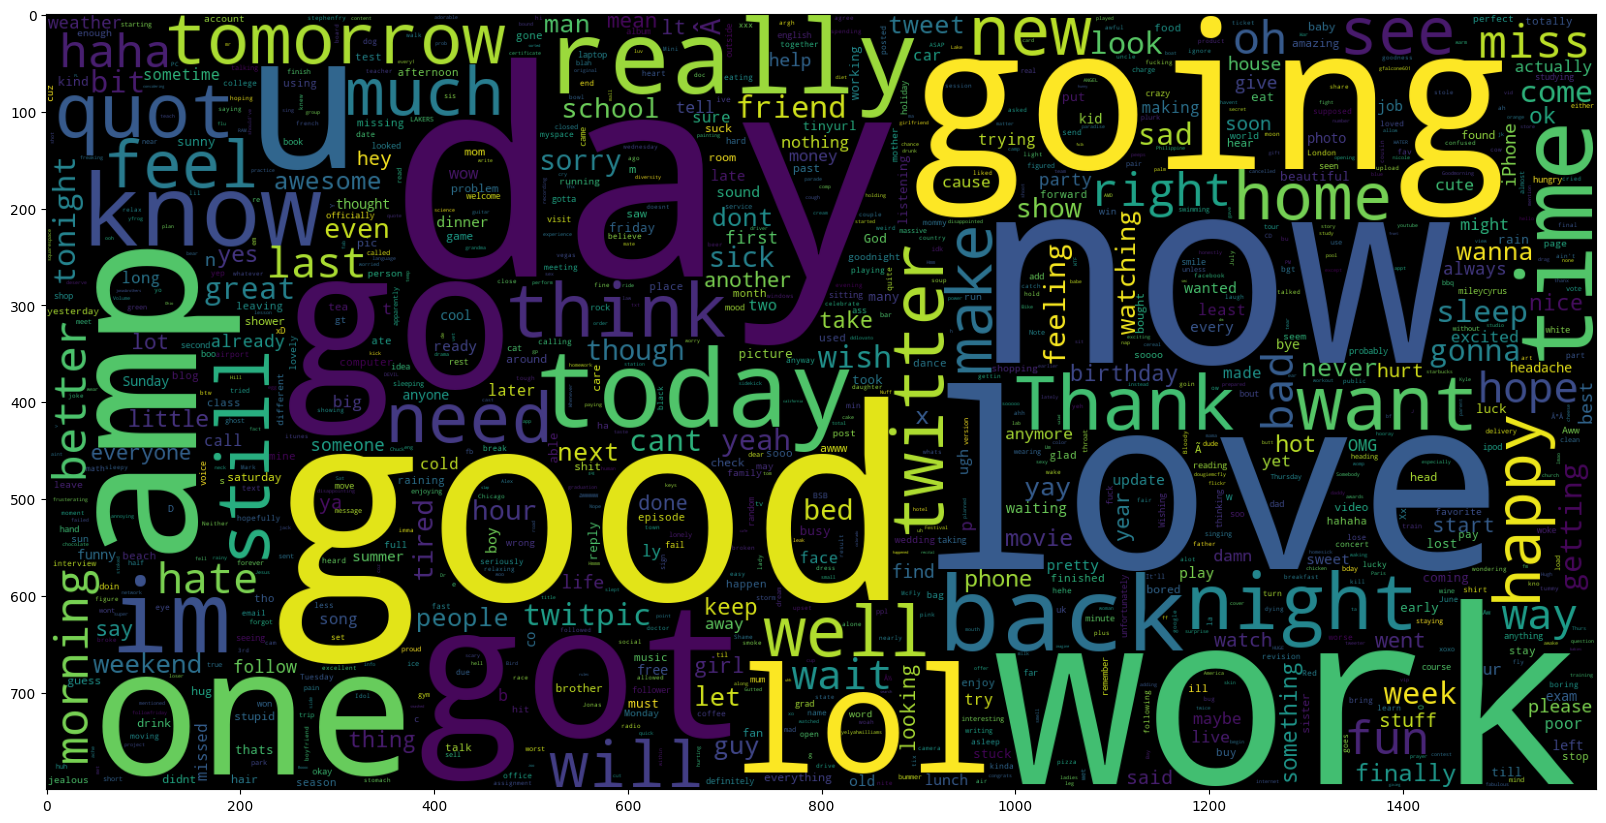

In [36]:
data_pos = data['text'][8000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [38]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  87086


In [39]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [46]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

arrx = []
arry = []
best = 0
best_k = 5
for x in range(1, 100):
    model = KNeighborsClassifier(x)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    arrx.append(x)
    arry.append(acc*100)
    if acc > best:
        best = acc
        best_k = x
print("{} || {}".format(x, best))

99 || 0.7085828343313373


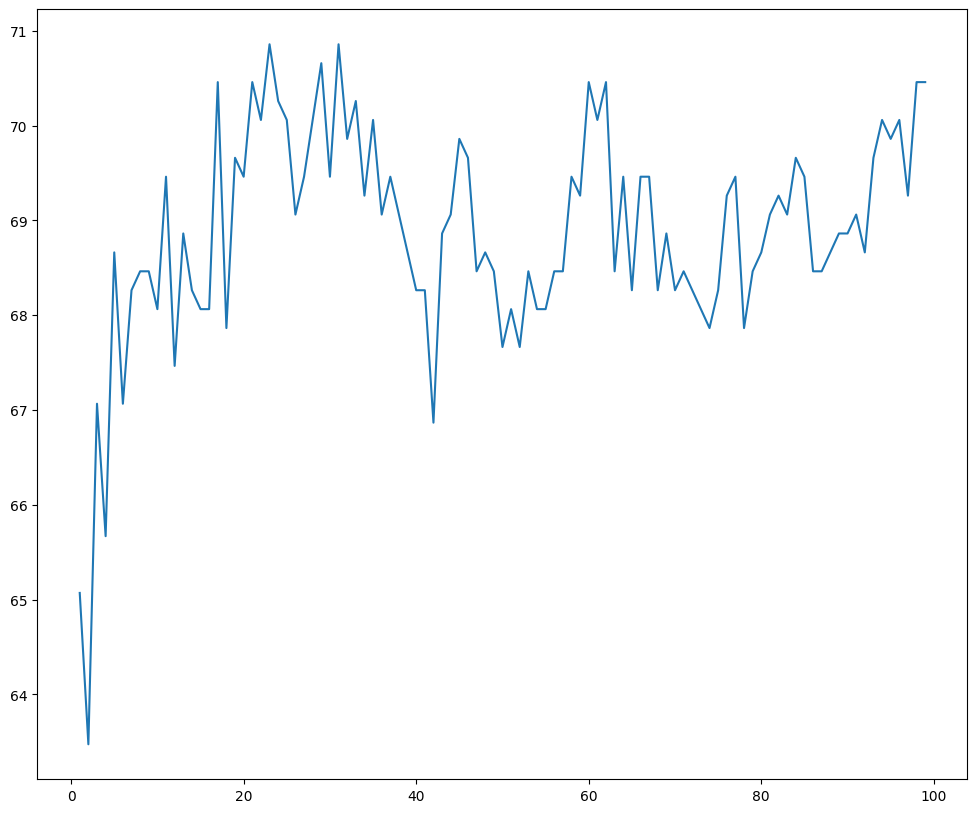

In [42]:
plt.figure(figsize=(12, 10))
plt.plot(arrx, arry)
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       258
           1       0.73      0.63      0.68       243

    accuracy                           0.71       501
   macro avg       0.71      0.71      0.71       501
weighted avg       0.71      0.71      0.71       501

[[202  56]
 [ 90 153]]


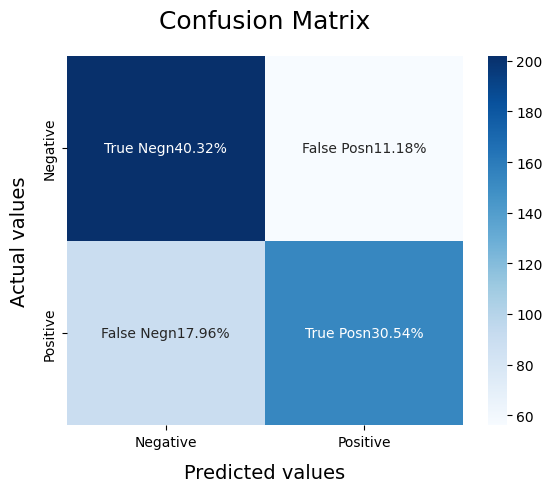

In [47]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(best_k)
model.fit(X_train, y_train)
model_Evaluate(model)
y_pred = model.predict(X_test)

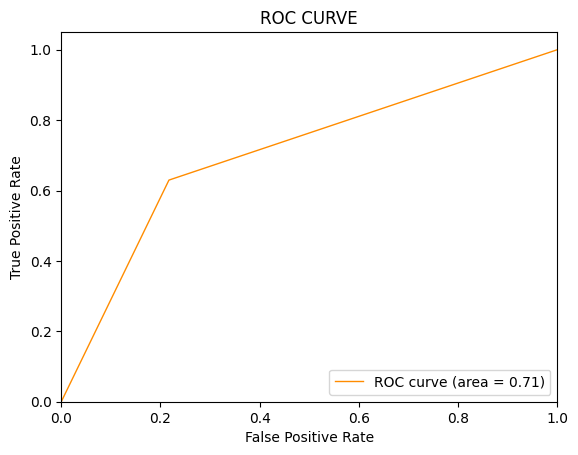

In [44]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()